# GMV and EW Portfolio

Although the promise of the Markowitz procedure is exciting, in tends to fall apart in practice. The problem is that we rarely know Expected Returns and Expected Covariance in advance. Our estimates almost certainly contain some estimation error, and we'll see that the procedure is highly sensitive to these errors, which tend to get exaggerated in the portfolio.

To see this, let's start by loading up our data as usual.

In [10]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
import kit as erk    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
ind = erk.get_ind_returns()

# Expected Returns
er = erk.annualize_rets(ind["1996":"2000"])

# Covariance Matrix
cov = ind["1996":"2000"].cov()

---

Let's look at a simple 2-asset portfolio and find the optimal weights if we had known what the returns would be.

In [12]:
l = ["Food", "Steel"]
erk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

Let's look at the returns of the two assets that dictated those weights

In [13]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

Now assume that we had a really good estimator, and we were off by only a fraction of a percent in our estimate, and we had estimated a return of 11 and 12 percent respectively for Food and Steel

In [14]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930353, 0.42069647])

We see that even a small change in the estimate causes a major change in the weights. What if we were off by around 1% to 2% percent in each estimate and estimated 10% and 13% instead of the return of 11.6% and 11.5%?

In [15]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([6.9388939e-17, 1.0000000e+00])

---

# Avoiding estimating returns

Let's look at the efficient frontier one more time.

<Axes: xlabel='Volatility'>

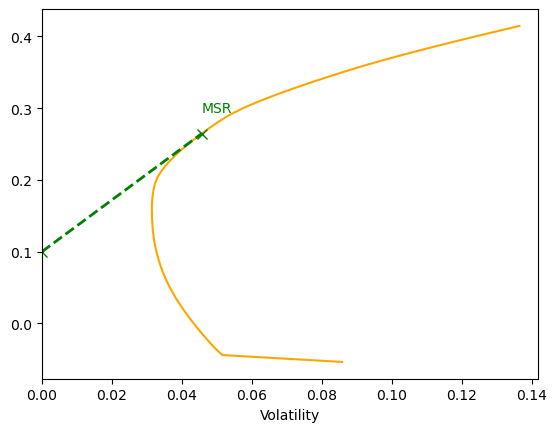

In [16]:
erk.plot_ef(50, er, cov, show_cml= True, riskfree_rate= 0.1)

One way to avoid this estimation game is to skip the entire process and just rely on _naive_ diversification, which means hold all stocks with equal weight. We can add the **Equal Weight Portfolio [EW]** to the plot by enhancing the `plot_ef` function.

```python
    if show_ew:
        n = er.shape[0]

        w_ew = np.repeat(1/n, n)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        
        # EW
        ax.plot([vol_ew], [r_ew], color='red', marker='o', markersize=10)
```


<Axes: xlabel='Volatility'>

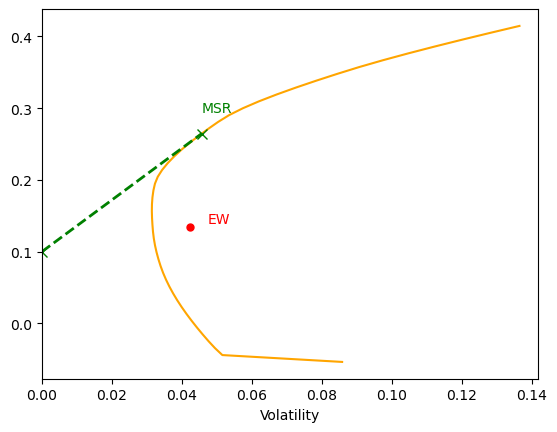

In [17]:
erk.plot_ef(50, er, cov, show_cml= True, riskfree_rate= 0.1, show_ew= True)

Researchers have shown that the EW portfolio is a remarkably good portfolio to hold. In fact, there is overwhelming support for the idea that it is a far better portfolio to hold than a cap-weighted equivalent. The EW portfolio is far inside the efficient frontier, but it requires no estimation whatsoever.

However, there is another point on the efficient frontier that is very interesting. This is the _extreme_ of the convex curve, which is the portfolio of lowest volatility across all possible portfolios. This is called the Minimum Volatility or the **Global Minimum Volatility Portfolio [GMV]**.

The interesting thing about it is that if we assume that all returns are the same, the optimizer cannot improve the sharpe ratio through raising returns, and so it must do so my lowering volatility. This means that if we just skip any returns estimation and assume all returns are just the same, we'd get the weights of the GMV portfolio.

```python
def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    
    # np.repeat(1, n) for equal dummy weights
    return msr(0, np.repeat(1, n), cov)
```

and we can add that to the plot as follows:

```python
    if show_gmv:

        w_gmv = gmv(cov)
        r_gmv = portfolio_return(w_gmv, er)
        vol_gmv = portfolio_vol(w_gmv, cov)

        # GMW
        ax.plot([vol_gmv], [r_gmv], color='midnightblue', marker='o', markersize= 8)
```


<Axes: xlabel='Volatility'>

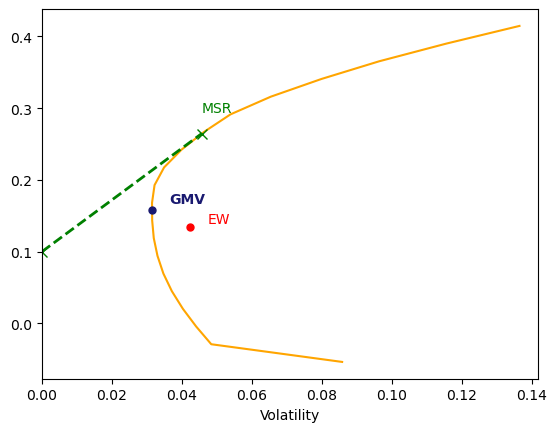

In [18]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True) 